In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('steam_games_final_format.csv')

In [40]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['total'])

genre_y = multilabel_binarizer.transform(df['total'])

In [41]:
df = df.join(pd.DataFrame(genre_y, columns=multilabel_binarizer.classes_, index=df.index))

In [42]:
df_kmeans = df.drop(['url', 'name', 'languages', 'total'], axis=1)

In [43]:
df_kmeans[df_kmeans.columns] = StandardScaler().fit_transform(df_kmeans)

In [44]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_kmeans)

Text(0, 0.5, 'WCSS')

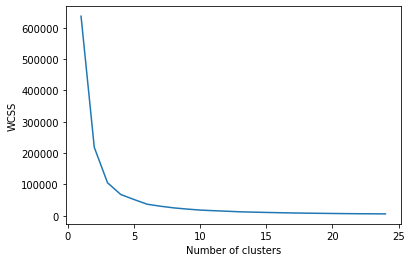

In [59]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(pca_2_result)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [60]:
kmeans = KMeans(5)
kmeans.fit(pca_2_result)
identified_clusters = kmeans.fit_predict(pca_2_result)
identified_clusters

array([4, 4, 4, ..., 0, 2, 0], dtype=int32)

In [61]:
pca_df = pd.DataFrame(pca_2_result, columns=['pca_1', 'pca_2'])

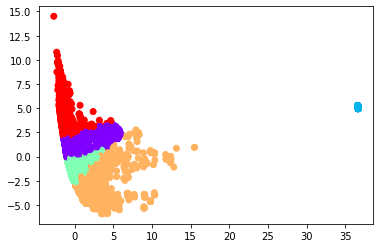

In [62]:
data_with_clusters = pca_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['pca_1'],data_with_clusters['pca_2'],c=data_with_clusters['Clusters'],cmap='rainbow')